# Metode Penyelesaian Persamaan Tak Linear

# Soal 1

Jelaskan secara singkat perbedaan mendasar Metode Sekan dibandingkan Metode Bagi Dua dan Metode Posisi Palsu

## Metode Sekan
- Tidak harus mencari turunan
- Tebakan awal bisa sembarang

## Metode Bagi Dua
- Kekonvergenan Lamban 
- Tebakan awal tidak bisa sembarang (bersyarat)

## Metode Posisi Palsu
- Kekonvergenan lebih cepat
- Iterasi lebih banyak

# Soal 2

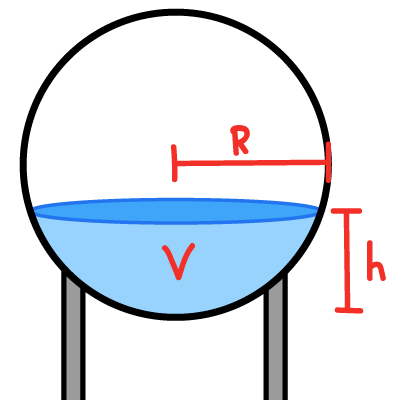

Pada suatu hari yang cerah, pak lurah datang ke rumah anda. Beliau bercerita bahwa sumurnya sedang dilanda kekeringan. Sehingga, beliau ingin membuat sebuah tangki penampungan air. Karena satu dan lain hal, beliau hanya memiliki tangki berbentuk bola.

Tangki tersebut memiliki suatu penanda, sehingga dapat diketahui tinggi air yang ada di dalam tangki tersebut. Pak lurah ingin tahu, berapa tinggi air di dalam tangki, yang dibutuhkan untuk mengisi tangki dengan volume air tertentu.

Anda sebagai mahasiswa jurusan matematika yang budiman, ingin membantu pak lurah menyelesaikan permasalahan yang ia hadapi dengan cara membuat sebuah program.

====================================================================================
 
Diketahui bahwa volume air pada tangki berbentuk bola, dapat dihitung menggunakan persamaan $V = \pi h^2 \big( \frac{3R-h}{3} \big)$.
 
Jika diberikan jari-jari tangki $(R)$ serta volume air didalamnya $(V)$, lengkapi fungsi metode_bagi_dua (mencari akar menggunakan metode kurung), untuk menentukan tinggi air $(h)$ di dalam tangki tersebut.
 
**Ketentuan khusus:**
 
- **Dilarang meminta input pada pengguna** untuk nilai awal batas kiri dan batas kanan (dinotasikan dengan $a$ dan $b$). Silahkan tentukan sendiri nilai $a$ dan $b$, sehingga fungsi dapat bekerja untuk seluruh nilai $R$ dan $V$ yang mungkin dan memenuhi asumsi. 
 
- Fungsi me-return nilai dari variabel $h$ saja, dengan akurasi 4 angka di belakang koma.
 
- Praktikan dipersilahkan untuk membuat fungsi (baik fungsi maupun fungsi lambda) didalam fungsi metode_bagi_dua.

- Library yang dapat digunakan adalah: math.
 
**Asumsi yang digunakan:**
- $R$, $V$, dan $h$ merupakan bilangan riil
- $R > 0$
- $0 \leq V \leq \frac{4}{3} \pi R^3$
- $a < b$
- Syarat berhenti ${b_i - a_i} < 10^{-8}$ atau $|f(h_i)| < 10^{-8}$ pada suatu iterasi ke-i

**Fungsi metode_bagi_dua:**
- Deskripsi: Mencari ketinggian air didalam tangki, jika diberikan volume air tersebut beserta jari-jari tangki.
- Masukan:
  - $R$: Jari-jari tangki
  - $V$: Volume air di dalam tangki
- Keluaran:
  - $h$: Ketinggian air

Syarat tinggi h berada pada interval $ 0 \le h \le 2R$
sehingga $ 0 \le a < b \le 2R$ dan

In [ ]:
### Jawaban soal 2 ###
from math import pi
def metode_bagi_dua(R, V):
  ### Isi jawaban Anda di bawah ###
  f = lambda h: V - pi*(h**2)*(3*R - h)/3

 

  #Syarat berhenti 
  eps = 10**-8 

  #Syarat a,b harus antara 0 dan 2*R dengan a<b dan f(a)*f(b)>0 
  a = 4
  b = 12
  fa=f(a)
  fb=f(b)

  if b<=a or 0<=fa*fb: 
    return "Invalid input"
  while True:   
    c = (a+b)/2
    fc=f(c)

    if fa*fc<0:
      b = c
      fb=fc
    else:
      a = c
      fa=fc

    if abs(fc) < eps or (b-a) < eps :
      break
  return c




# Periksa jawaban 2

In [ ]:
R = 2
V = 5
print(metode_bagi_dua(R, V))

5.861005663871765


# Soal 3

Buatlah fungsi $mod\_false\_pos(f,a,b,eps,delta)$ dengan input suatu fungsi lambda $f(x)$, dua bilangan real $a,b$ sebagai tebakan awal, batas galat eps dan delta (default $eps=10^{-5}$, $delta=10^{-5}$), dan memberikan return (output) hampiran akar dari $f(x)$ (4 angka di belakang koma), menggunakan metode modifikasi posisi palsu

*   dapat diasumsikan $a<b$
*   dapat diasumsikan $f(x)$ kontinu pada $[a,b]$
*   $mod\_false\_pos(f,a,b,eps,delta)$ akan memberikan return string "Invalid input" jika $f(a)f(b)>0$
*   inisiasi $clama = 2b-a$ (cek modul)
*   iterasi akan berhenti jika $|fc|<eps$ atau $|c-clama|<delta$ (cek modul)

In [ ]:
### Jawaban soal 3 ###
def mod_false_pos(f, a, b, eps = 1e-4, delta = 1e-5):
  ### Isi jawaban Anda di bawah ###
  fa=f(a)
  fb=f(b)

  if b<=a or 0<=fa*fb: 
    return "Invalid input"

  clama= 2*b-a
  kiri=0
  kanan=0

  while True :
    c = a-fa*(b-a)/(fb-fa)
    fc=f(c)

    if fa*fc<0:
      b = c
      fb=fc
      kanan,kiri = 0, kiri+1
      if kiri > 2 :
          fa = fa/2

    else:
      a = c
      fa=fc
      kiri,kanan = 0, kanan+1
      if kanan > 2 :
          fb = fb/2

    if abs(c-clama) < delta or abs(fc) < eps :
      break
    clama=c
  return c

# Periksa jawaban 3

In [ ]:
F = lambda x: (x - 1)**3
A = 0
B = 3 
print(mod_false_pos(F, A, B))

0.9664817247324026


# Tips

Perintah $break$ dapat digunakan untuk menghentikan suatu loop



```
>>> for i in range(5):
      if i < 3:
        print(i)
      else:
        break

0
1
2

>>> i = 0
>>> while i < 5:
      if i < 3:
        print(i)
      else:
        break
      i += 1

0
1
2
```

